In [ ]:
from google.colab import drive
drive.mount('/gdrive/')
%cd /gdrive

Drive already mounted at /gdrive/; to attempt to forcibly remount, call drive.mount("/gdrive/", force_remount=True).
/gdrive


In [ ]:
ls

MyDrive/  Shareddrives/


In [ ]:
cd/gdrive/My Drive/Food classification/

/gdrive/My Drive/Food classification


In [ ]:
ls

not_pizza/  pizza/


In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.layers import Input,Conv2D,MaxPool2D,Dense, Flatten, GlobalAveragePooling2D


In [ ]:
from tensorflow.keras.models import Sequential
import cv2
import pathlib

In [ ]:
path="/gdrive/My Drive/Food classification"
data_dir=pathlib.Path(path)

In [ ]:
import random
import glob

In [ ]:
image=glob.glob("/gdrive/My Drive/Food classification/*/*.jpg")
image=pd.Series(image)
print("No of images :",len(image))

No of images : 1966


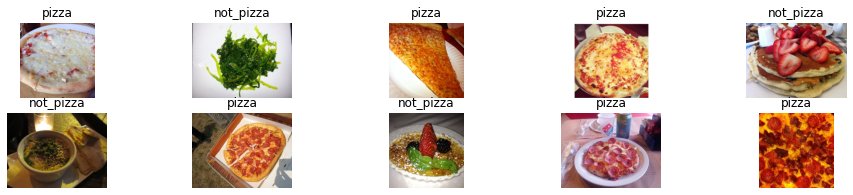

In [ ]:
classes=os.listdir(path)

plt.figure(figsize=(16,8))

for x in range(10):
    i=random.randint(0,1)
    images=os.listdir(path+'/'+classes[i])
    j=random.randint(0,900)
    image=cv2.imread(path+'/'+classes[i]+'/'+images[j])
    image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    ax=plt.subplot(5,5,x+1)
    plt.imshow(image)
    plt.title(classes[i])
    plt.axis("off")
    
    
plt.show()

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_data=ImageDataGenerator(rescale=1./255,validation_split=0.2)
train_ds=train_data.flow_from_directory(
    path,
    subset='training',
    target_size=(224,224),
    batch_size=32
    
)
test_ds=train_data.flow_from_directory(
    path,
    subset='validation',
    target_size=(224,224),
    batch_size=32
)

Found 1574 images belonging to 2 classes.
Found 392 images belonging to 2 classes.


In [ ]:
from tensorflow.keras.applications import MobileNet

In [ ]:
mobilenet=MobileNet(
    input_shape=(224,224,3),
    include_top=False,
    weights='imagenet'
)

In [ ]:
for layers in mobilenet.layers:
    layers.trainable=False

In [ ]:
from tensorflow import keras
from keras.layers import Dropout

In [ ]:
model=Sequential()
model.add(mobilenet)
model.add(GlobalAveragePooling2D())
model.add(Flatten())
model.add(Dense(1024,activation='relu'))
model.add(Dense(512,activation='relu'))
model.add(Dense(2,activation='softmax',name='classification'))

In [ ]:
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.001,momentum=0.9),
             loss='categorical_crossentropy',
             metrics=['accuracy'])


model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenet_1.00_224 (Functio  (None, 7, 7, 1024)       3228864   
 nal)                                                            
                                                                 
 global_average_pooling2d (G  (None, 1024)             0         
 lobalAveragePooling2D)                                          
                                                                 
 flatten (Flatten)           (None, 1024)              0         
                                                                 
 dense (Dense)               (None, 1024)              1049600   
                                                                 
 dense_1 (Dense)             (None, 512)               524800    
                                                                 
 classification (Dense)      (None, 2)                 1

In [ ]:
history=model.fit(train_ds,validation_data=test_ds,epochs=5)

Epoch 1/5
50/50 [==============================] - 51s 999ms/step - loss: 0.3546 - accuracy: 0.8450 - val_loss: 0.1753 - val_accuracy: 0.9388
Epoch 2/5
50/50 [==============================] - 49s 983ms/step - loss: 0.1640 - accuracy: 0.9371 - val_loss: 0.1477 - val_accuracy: 0.9490
Epoch 3/5
50/50 [==============================] - 49s 985ms/step - loss: 0.1382 - accuracy: 0.9441 - val_loss: 0.1282 - val_accuracy: 0.9643
Epoch 4/5
50/50 [==============================] - 49s 985ms/step - loss: 0.1124 - accuracy: 0.9574 - val_loss: 0.1286 - val_accuracy: 0.9515
Epoch 5/5
50/50 [==============================] - 49s 1s/step - loss: 0.0956 - accuracy: 0.9632 - val_loss: 0.1189 - val_accuracy: 0.9617


In [ ]:
model.evaluate(test_ds)

13/13 [==============================] - 10s 743ms/step - loss: 0.1189 - accuracy: 0.9617


[0.11888724565505981, 0.9617347121238708]

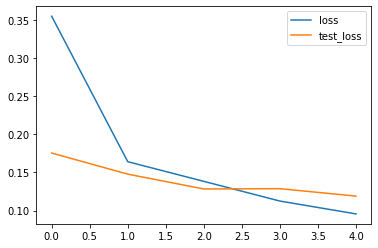

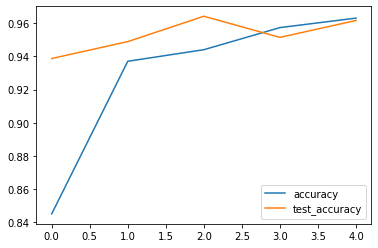

In [ ]:
plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss','test_loss'],loc='upper right')
plt.show()


plt.figure()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['accuracy','test_accuracy'])

plt.show()


In [ ]:
model.save('Food classification.h5')